<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 10/09/2021
- Convocatoria 2 - 06/10/2021

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros. 

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que hacer un tag al repositorio en una fecha anterior a la fecha de entrega de la actividad, y pegar el enlace al tag del repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

In [91]:
#importamos las librerías
import numpy as np
import pandas as pd
import requests
from pandas import DataFrame


#Lectura y almacenamiento de datos desde la URL

#Resultados en los últimos 120 años
url1 = '../src/athlete_events.csv'
events = pd.read_csv(url1, sep=',', warn_bad_lines=True, error_bad_lines=False)

#Pruebas olímpicas y resultados
url2 = '../src/results.csv'
results = pd.read_csv(url2, sep=',', warn_bad_lines=True, error_bad_lines=False)

#Impresión de los ficheros completos
print(events)
print('\n')
print(results)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

b'Skipping line 156: expected 8 fields, saw 9\nSkipping line 157: expected 8 fields, saw 9\nSkipping line 158: expected 8 fields, saw 9\nSkipping line 317: expected 8 fields, saw 9\nSkipping line 318: expected 8 fields, saw 9\nSkipping line 319: expected 8 fields, saw 9\nSkipping line 1658: expected 8 fields, saw 9\nSkipping line 1659: expected 8 fields, saw 9\nSkipping line 1660: expected 8 fields, saw 9\nSkipping line 1784: expected 8 fields, saw 9\nSkipping line 1785: expected 8 fields, saw 9\nSkipping line 1786: expected 8 fields, saw 9\n'


### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

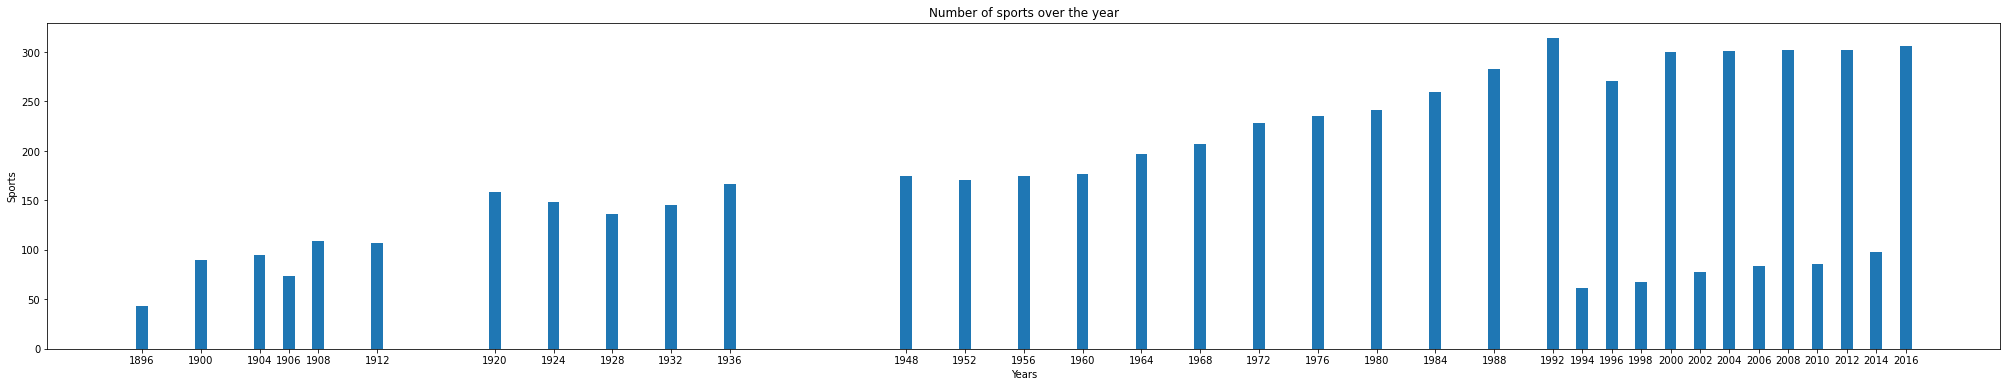

In [90]:
#importamos matoplib
import matplotlib.pyplot as plt

#obtener los datos del Dataframe
years = np.sort(events['Year'].unique())    
sports_per_year = []
for i in range (len(years)):
    sports_per_year.append(len(events[events['Year'] == years[i]]['Event'].unique()))
    
# Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes

#Damos título al Gráfico

#Creamos la grafica de barras utilizando 'Years' como eje X y 'Number of Sports' como eje y.


plt.figure(figsize = (35,6))
plt.bar(years, sports_per_year)
plt.title('Number of sports over the year')

plt.xticks(years, years)
plt.xlabel('Years')
plt.ylabel('Sports')

#Finalmente mostramos la grafica con el metodo show()
plt.show()


In [ ]:
#Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo




In [ ]:
#Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais 




### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)

In [ ]:
#https://www.w3schools.com/python/python_ml_getting_started.asp